In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
corr = data.corr()

<Axes: >

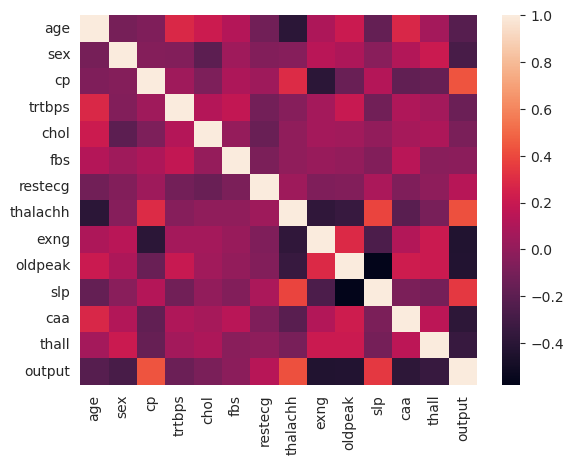

In [5]:
sns.heatmap(corr)

Now we'll do a breaf analysis

<Axes: xlabel='age', ylabel='Count'>

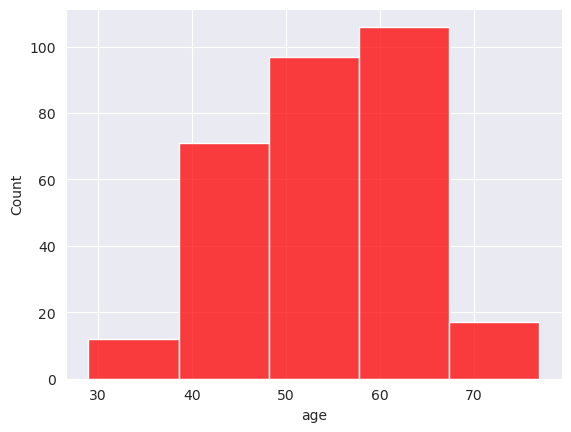

In [6]:
sns.histplot(data['age'], color="Red", bins=5)

This histogram shows that the peak of the Heart attacks happened between 50 - 60 years old

In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We'll do a comparison between male and female, but unfortunetly the Meta of the data dose not clarify what is 1 and 0 so I'll supposed that 0 is male and 1 is female

In [8]:
male = data[data['sex'] == 0]
female = data[data['sex'] == 1]
female.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,53.758454,1.0,0.932367,130.946860,239.289855,0.159420,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275
std,8.883803,0.0,1.059064,16.658246,42.782392,0.366955,0.510754,24.130882,0.484505,1.174632,0.627378,1.074082,0.659949,0.498626
min,29.000000,1.0,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.0,0.000000,120.000000,208.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.0,0.000000,130.000000,235.000000,0.000000,1.000000,151.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,59.500000,1.0,2.000000,140.000000,268.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.0,3.000000,192.000000,353.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


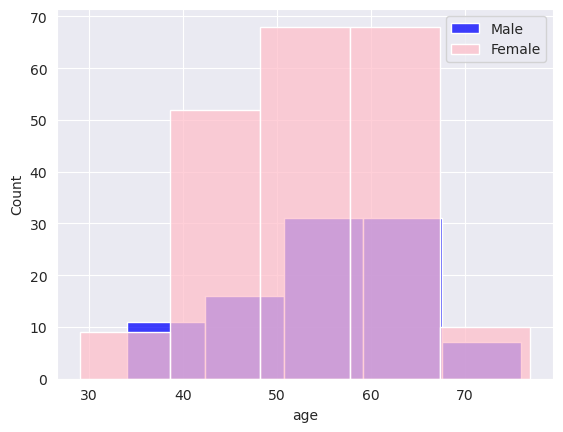

In [9]:
sns.histplot(male['age'], color="blue", bins=5 , label = 'Male')
sns.histplot(female['age'], color="pink", bins=5 , label = 'Female')
plt.legend()
plt.show()



This Dataset is biased to gender 1 which is not recomend to make further analysis in terms of gender

I'll raise a question which is: does resting blood pressure (in mm Hg) is a main condetion indecate heart attack?

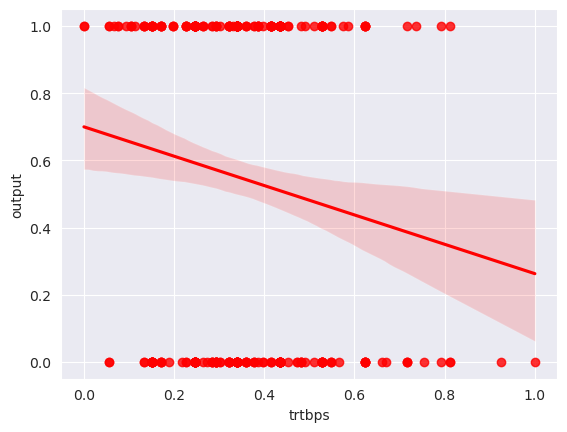

<Figure size 2560x1920 with 0 Axes>

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['trtbps'] = scaler.fit_transform(data[['trtbps']])
sns.regplot(data=data, x = 'trtbps', y='output',color="red", scatter= 'kws')
plt.figure(dpi=400)
plt.show()

I'll do a Logistic regression to predict if heart attack going to happen or not bassed on the data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from joblib import Parallel, delayed

def calculate_accuracy(random_state):
    X = data.drop('output', axis=1)
    y = data['output']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

num_iterations = 1000
random_states = np.arange(num_iterations)

# Parallelize the loop using joblib
acc = Parallel(n_jobs=-1)(delayed(calculate_accuracy)(random_state) for random_state in random_states)

best_acc_idx = np.argmax(acc)
best_acc = acc[best_acc_idx]

X = data.drop('output', axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_acc_idx)

model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
#

/home/mohammed/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohammed/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [12]:
accuracy

0.9340659340659341